In [1]:
from pathlib import Path
from scipy import stats

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from sklearn.linear_model import LogisticRegression

from IPython.display import display, Markdown

In [2]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [3]:
app_train = pd.read_csv(DATASET_DIR / "2. Datenaufbereitung" / "app_train.csv")
pa_ip = pd.read_csv(DATASET_DIR / "2. Datenaufbereitung" / "pa_ip.csv")
description = pd.read_csv(DATASET_DIR / "HomeCredit_columns_description.csv", encoding="latin", index_col=0)

In [4]:
app_train = app_train.set_index("SK_ID_CURR")
pa_ip = pa_ip.set_index("SK_ID_CURR")

In [5]:
ID_Payback = app_train[app_train["TARGET"] == 0].index.values
ID_Default = app_train[app_train["TARGET"] == 1].index.values

In [6]:
ID_Payback = np.intersect1d(ID_Payback, pa_ip.index.values)
ID_Default = np.intersect1d(ID_Default, pa_ip.index.values)

In [7]:
payback = pa_ip.loc[ID_Payback]
default = pa_ip.loc[ID_Default]

In [8]:
mets = ["PA_AMT_ANNUITY", "PA_AMT_APPLICATION", "PA_AMT_CREDIT", "PA_AMT_DOWN_PAYMENT", "PA_AMT_GOODS_PRICE","PA_RATE_DOWN_PAYMENT"]

In [9]:
pa_ip.head()

,PA_CNT_CREDITS,PA_IP_PAYMENT_30,PA_IP_DAYS_DIFF_30,PA_IP_AMT_DIFF_30,PA_IP_PAYMENT_60,PA_IP_DAYS_DIFF_60,PA_IP_AMT_DIFF_60,PA_IP_PAYMENT_90,PA_IP_DAYS_DIFF_90,PA_IP_AMT_DIFF_90,PA_IP_PAYMENT_120,PA_IP_DAYS_DIFF_120,PA_IP_AMT_DIFF_120,PA_IP_PAYMENT_150,PA_IP_DAYS_DIFF_150,PA_IP_AMT_DIFF_150,PA_IP_PAYMENT_180,PA_IP_DAYS_DIFF_180,PA_IP_AMT_DIFF_180,PA_AMT_ANNUITY,PA_AMT_APPLICATION,PA_AMT_CREDIT,PA_AMT_DOWN_PAYMENT,PA_AMT_GOODS_PRICE,PA_RATE_DOWN_PAYMENT,PA_CNT_NAME_CONTRACT_TYPE_Revolving loans,PA_CNT_NAME_CONTRACT_STATUS_Refused,PA_CNT_CODE_REJECT_REASON_HC,PA_CNT_NAME_CLIENT_TYPE_New,PA_CNT_NAME_CLIENT_TYPE_Refreshed,PA_CNT_NAME_PORTFOLIO_Cards,PA_CNT_NAME_PRODUCT_TYPE_walk-in,PA_CNT_NAME_YIELD_GROUP_high,PA_CNT_NAME_YIELD_GROUP_low_normal,PA_CNT_PRODUCT_COMBINATION_Card Street,PA_CNT_PRODUCT_COMBINATION_Cash X-Sell: low,PA_CNT_PRODUCT_COMBINATION_POS industry with interest
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
252457,1,-9.128709e-01,0.0,0.0,9.128709e-01,-15.0,0.0,9.128709e-01,-17.0,0.0,0.912871,-14.0,0.0,-0.912871,0.0,0.0,-0.912871,0.0,0.0,4951.350,47056.275,52641.0,4.275,47056.275,0.000088,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
256657,2,2.041241e-01,-6.0,0.0,2.041241e-01,-13.0,0.0,2.041241e-01,-12.0,0.0,0.204124,-12.5,0.0,0.204124,-13.0,0.0,-1.020621,-1.5,0.0,49054.770,978570.000,1198062.0,15714.000,978570.000,0.217818,2.0,7.0,5.0,1.0,0.0,2.0,5.0,0.0,2.0,1.0,0.0,0.0
198678,2,4.540312e-08,-20.0,0.0,4.540312e-08,-21.5,0.0,4.540312e-08,-6.5,0.0,-0.000407,-1.0,0.0,0.000204,0.5,0.0,0.000204,-0.5,0.0,98806.050,921721.500,941661.0,13347.000,921721.500,0.193358,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
394447,1,6.508755e-01,0.0,0.0,8.148280e-01,-1.0,0.0,-1.044958e+00,-1.0,0.0,-0.867506,-2.0,0.0,-0.768616,-2.0,0.0,1.215377,0.0,0.0,2250.000,45000.000,45000.0,0.000,45000.000,0.000000,1.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
156331,2,-7.381905e-01,0.0,0.0,1.416426e-02,0.0,0.0,1.416426e-02,0.0,0.0,-1.114368,-1.0,0.0,1.207845,-12.5,0.0,0.616385,-5.0,0.0,40866.795,793035.000,793035.0,0.000,793035.000,0.000000,2.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,1.0,0.0,0.0


### PA_AMT_ANNUITY

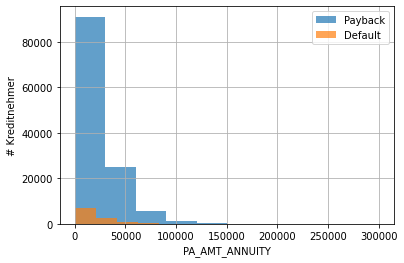

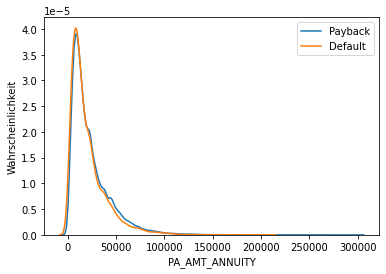

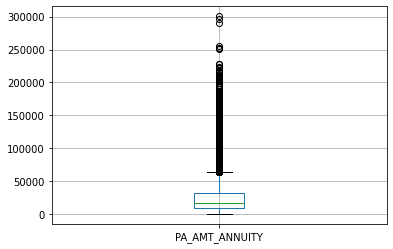

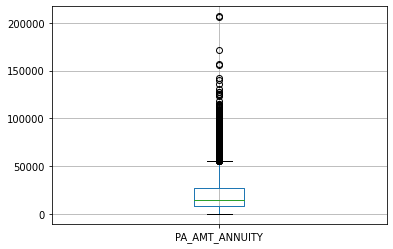

### PA_AMT_APPLICATION

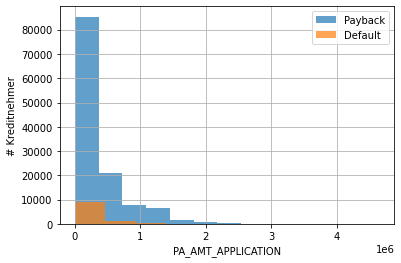

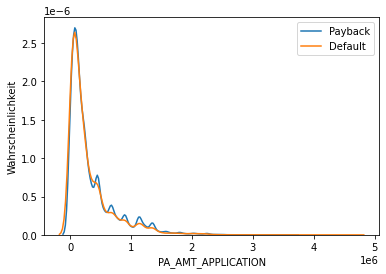

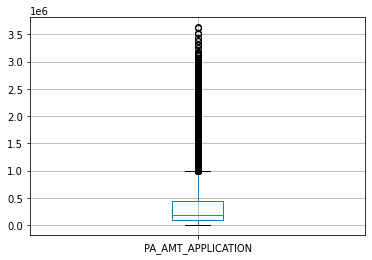

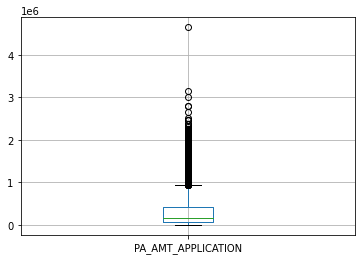

### PA_AMT_CREDIT

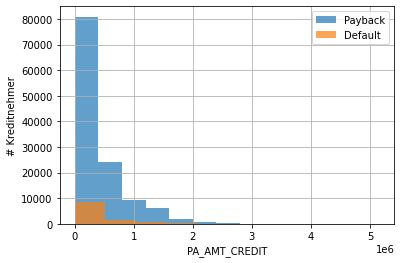

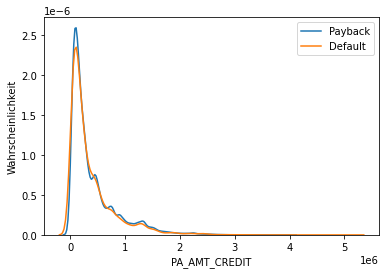

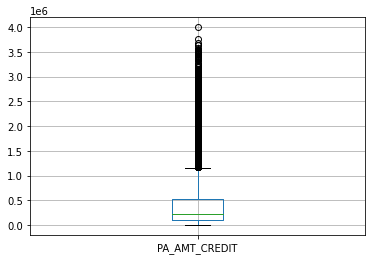

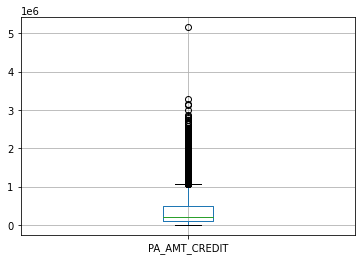

### PA_AMT_DOWN_PAYMENT

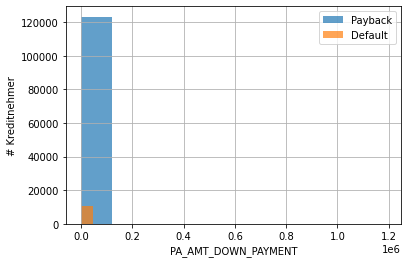

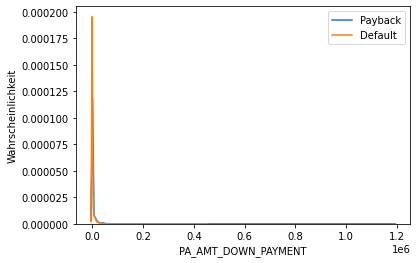

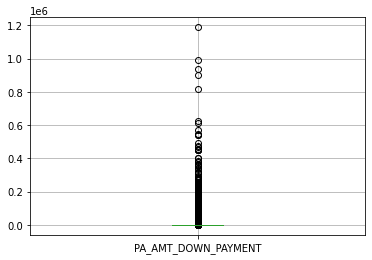

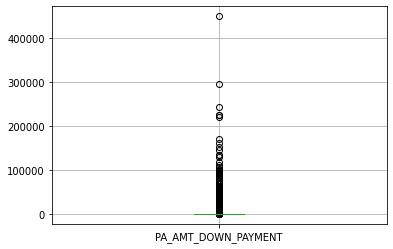

### PA_AMT_GOODS_PRICE

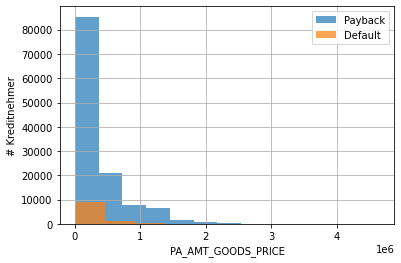

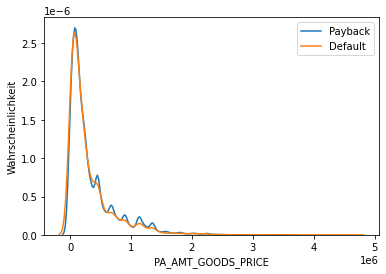

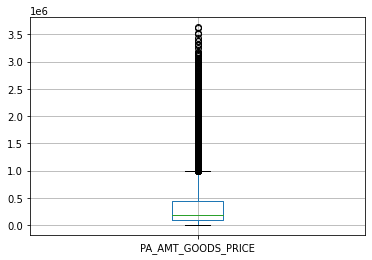

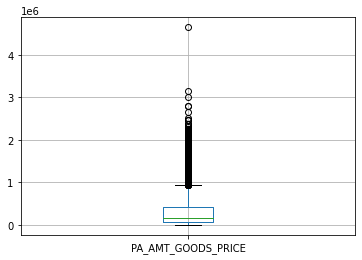

### PA_RATE_DOWN_PAYMENT

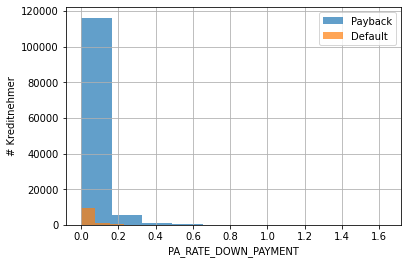

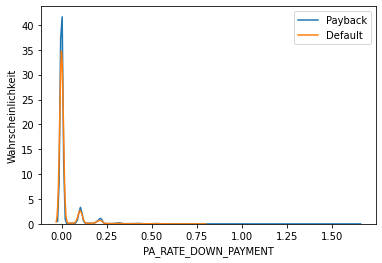

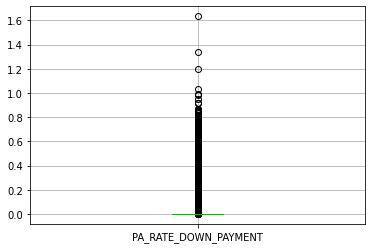

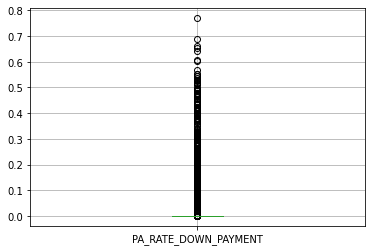

In [10]:
for head in mets:
    display(Markdown("### {head}".format(head=head)))

    pb = payback[head].copy()
    df = default[head].copy()

    pb.hist(alpha=0.7)
    df.hist(alpha=0.7)
    plt.legend(labels=["Payback","Default"])
    plt.xlabel(head)
    plt.ylabel("# Kreditnehmer")
    plt.show()

    sns.kdeplot(pb, alpha=0.7)
    sns.kdeplot(df, alpha=0.7)

    plt.legend(labels=["Payback","Default"])
    plt.xlabel(head)
    plt.ylabel("Wahrscheinlichkeit")
    plt.show()
    
    payback[[head]].boxplot()
    plt.show()
    default[[head]].boxplot()
    plt.show()

In [11]:
todo = ["PA_AMT_ANNUITY","PA_AMT_APPLICATION","PA_AMT_CREDIT","PA_AMT_DOWN_PAYMENT","PA_AMT_GOODS_PRICE","PA_RATE_DOWN_PAYMENT"]

In [12]:
pa_ip[todo].head()

,PA_AMT_ANNUITY,PA_AMT_APPLICATION,PA_AMT_CREDIT,PA_AMT_DOWN_PAYMENT,PA_AMT_GOODS_PRICE,PA_RATE_DOWN_PAYMENT
SK_ID_CURR,,,,,,
252457,4951.350,47056.275,52641.0,4.275,47056.275,0.000088
256657,49054.770,978570.000,1198062.0,15714.000,978570.000,0.217818
198678,98806.050,921721.500,941661.0,13347.000,921721.500,0.193358
394447,2250.000,45000.000,45000.0,0.000,45000.000,0.000000
156331,40866.795,793035.000,793035.0,0.000,793035.000,0.000000


PA_AMT_ANNUITY

In [13]:
head = "PA_AMT_ANNUITY"

In [14]:
print(pa_ip[head].quantile(1))
print(pa_ip[head].quantile(0.99))
print(pa_ip[head].quantile(0.95))

300425.445
97445.78684999981
63675.0


In [15]:
ID_DROP = pa_ip[pa_ip[head] > pa_ip[head].quantile(0.99)].index.values

In [16]:
pa_ip.loc[ID_DROP, head] = np.nan

PA_AMT_APPLICATION

In [17]:
head = "PA_AMT_APPLICATION"

In [18]:
print(pa_ip[head].quantile(1))
print(pa_ip[head].quantile(0.99))
print(pa_ip[head].quantile(0.95))

4648500.0
1804500.0
1206000.0


In [19]:
ID_DROP = pa_ip[pa_ip[head] > pa_ip[head].quantile(0.99)].index.values

In [20]:
pa_ip.loc[ID_DROP, head] = np.nan

PA_AMT_CREDIT

In [21]:
head = "PA_AMT_CREDIT"

In [22]:
print(pa_ip[head].quantile(1))
print(pa_ip[head].quantile(0.99))
print(pa_ip[head].quantile(0.95))

5156820.0
2041691.8499999987
1343598.9749999978


In [23]:
ID_DROP = pa_ip[pa_ip[head] > pa_ip[head].quantile(0.99)].index.values

In [24]:
pa_ip.loc[ID_DROP, head] = np.nan

PA_AMT_DOWN_PAYMENT

In [25]:
head = "PA_AMT_DOWN_PAYMENT"

In [26]:
print(pa_ip[head].quantile(1))
print(pa_ip[head].quantile(0.99))
print(pa_ip[head].quantile(0.95))

1188000.0
50513.66999999978
18000.0


In [27]:
ID_DROP = pa_ip[pa_ip[head] > pa_ip[head].quantile(0.99)].index.values

In [28]:
pa_ip.loc[ID_DROP, head] = np.nan

PA_AMT_GOODS_PRICE

In [29]:
head = "PA_AMT_GOODS_PRICE"

In [30]:
print(pa_ip[head].quantile(1))
print(pa_ip[head].quantile(0.99))
print(pa_ip[head].quantile(0.95))

4648500.0
1804500.0
1206000.0


In [31]:
ID_DROP = pa_ip[pa_ip[head] > pa_ip[head].quantile(0.99)].index.values

In [32]:
pa_ip.loc[ID_DROP, head] = np.nan

PA_RATE_DOWN_PAYMENT

In [33]:
head = "PA_RATE_DOWN_PAYMENT"

In [34]:
print(pa_ip[head].quantile(1))
print(pa_ip[head].quantile(0.99))
print(pa_ip[head].quantile(0.95))

1.633636363636363
0.3773464059777396
0.19925748272346785


In [35]:
ID_DROP = pa_ip[pa_ip[head] > pa_ip[head].quantile(0.99)].index.values

In [36]:
pa_ip.loc[ID_DROP, head] = np.nan

## Plot Ergebnisse

### PA_AMT_ANNUITY

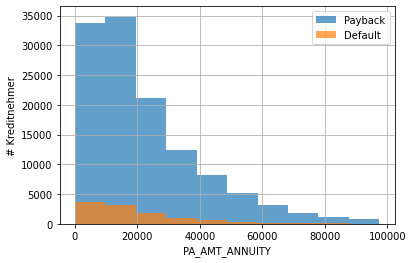

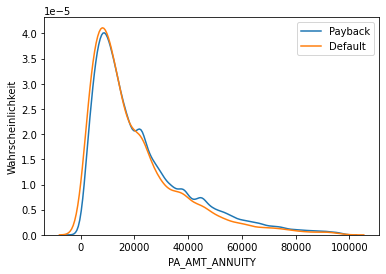

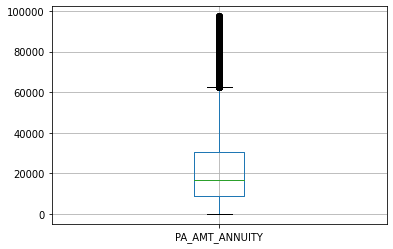

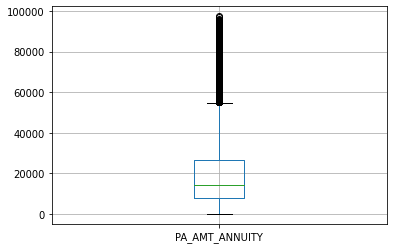

### PA_AMT_APPLICATION

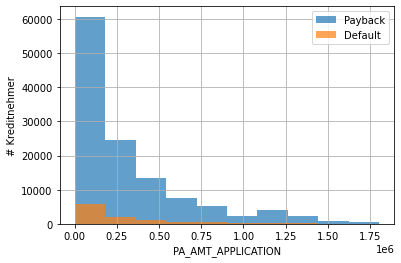

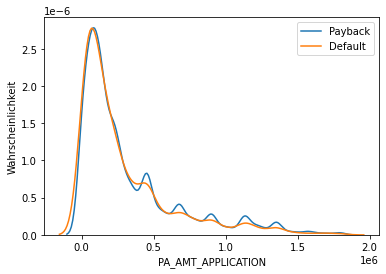

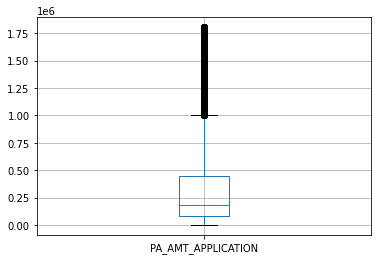

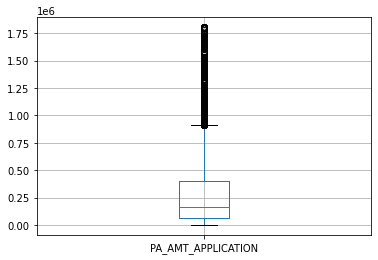

### PA_AMT_CREDIT

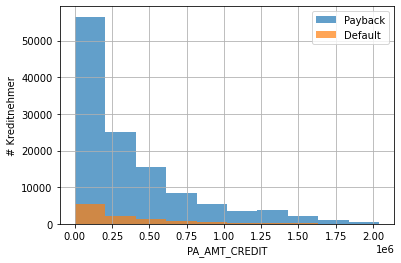

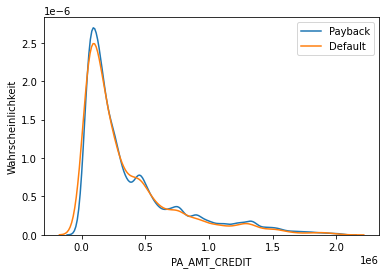

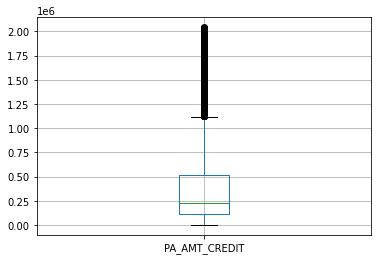

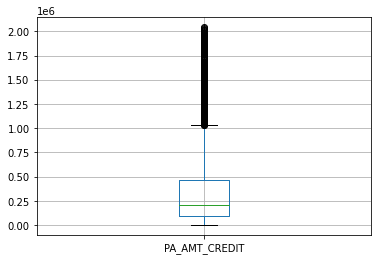

### PA_AMT_DOWN_PAYMENT

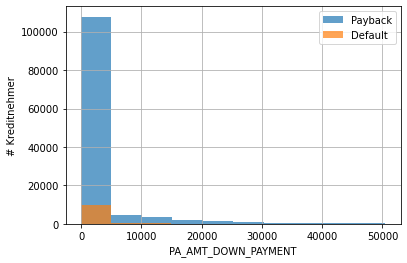

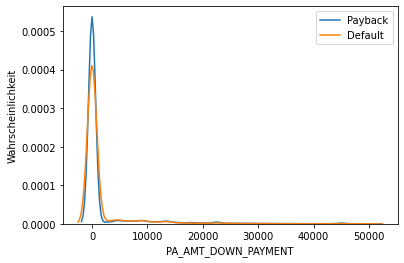

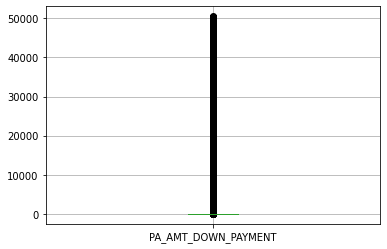

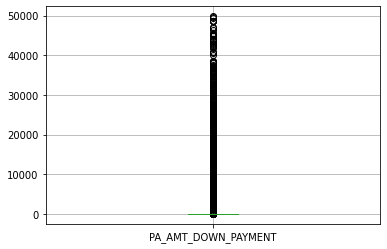

### PA_AMT_GOODS_PRICE

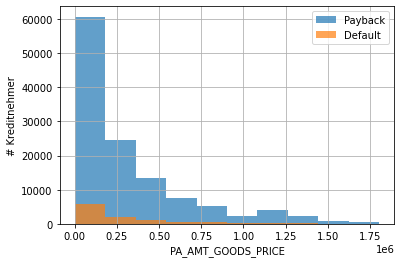

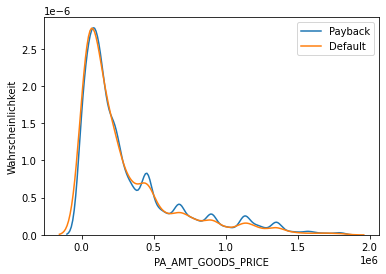

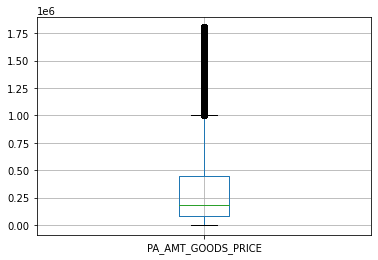

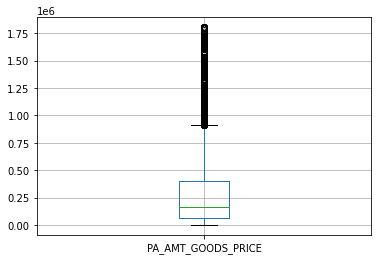

### PA_RATE_DOWN_PAYMENT

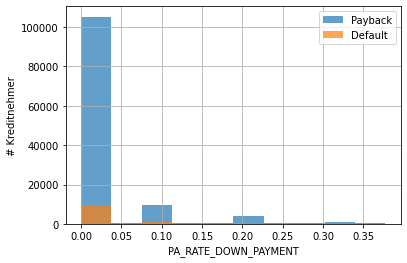

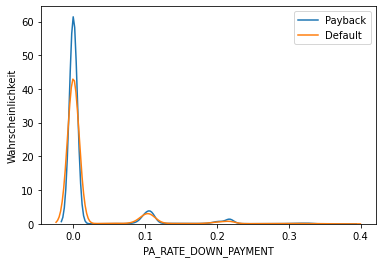

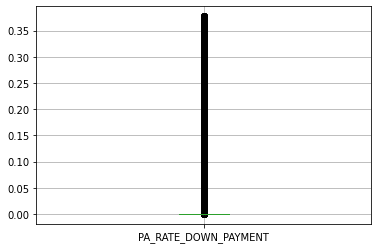

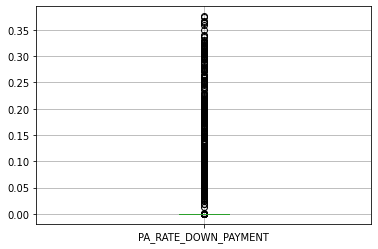

In [37]:
for head in todo:

    display(Markdown("### {head}".format(head=head)))

    payback = pa_ip.loc[ID_Payback]
    default = pa_ip.loc[ID_Default]

    pb = payback[head].copy()
    df = default[head].copy()

    pb.hist(alpha=0.7)
    df.hist(alpha=0.7)
    plt.legend(labels=["Payback","Default"])
    plt.xlabel(head)
    plt.ylabel("# Kreditnehmer")
    plt.show()

    sns.kdeplot(pb, alpha=0.7)
    sns.kdeplot(df, alpha=0.7)

    plt.legend(labels=["Payback","Default"])
    plt.xlabel(head)
    plt.ylabel("Wahrscheinlichkeit")
    plt.show()

    payback[[head]].boxplot()
    plt.show()
    default[[head]].boxplot()
    plt.show()


In [38]:
pa_ip.to_csv(DATASET_DIR / "3. Ausreißerbereinigung" / "pa_ip.csv")